# Configurando GPU RTX A2000 com tensorflow no Windows 11

Criado por: Nielsen C. Damasceno Dantas


Data de criacao: 28/06/2024

______

Requeriments:
- pandas
- scikit-learn
- seaborn
- matplotlib
- Python 3.10.15
- pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118




## Faça o download do CUDA toolkit 11.6 para Windows 11
https://developer.nvidia.com/cuda-11-6-0-download-archive?target_os=Windows&target_arch=x86_64

## Faça o Download cuDNN v8.6.0 
https://developer.nvidia.com/rdp/cudnn-archive

## Siga os passos conforme esse tutorial aqui para configuração do Path
https://medium.com/analytics-vidhya/using-tensorflow-on-windows-10-with-nvidia-rtx-3000-series-gpus-637ab2a4b163

## Instale a lib zlibdll 
Download and extract the zlib package from http://www.winimage.com/zLibDll/zlib123dllx64.zip for 64 bit windows then copy the zlibdll file into cudnn/bin

# Avaliando PyToch

In [1]:
import torch

# Verificar se a GPU está disponível
print("PyTorch versão:", torch.__version__)
print("CUDA disponível:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Nome da GPU:", torch.cuda.get_device_name(0))
    print("Memória da GPU:", torch.cuda.memory_allocated(0), "bytes")

PyTorch versão: 2.5.1+cu118
CUDA disponível: True
Nome da GPU: NVIDIA RTX A2000 12GB
Memória da GPU: 0 bytes


## Operação simples na GPU

In [2]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = torch.tensor([1.0, 2.0, 3.0, 4.0], device=device)
print("\nTensor na GPU:", tensor)
print("Soma do tensor (GPU):", tensor.sum().item())


tensor_cpu = tensor.to("cpu")
print("\nTensor transferido para CPU:", tensor_cpu)
print("Soma do tensor (CPU):", tensor_cpu.sum().item())


Tensor na GPU: tensor([1., 2., 3., 4.], device='cuda:0')
Soma do tensor (GPU): 10.0

Tensor transferido para CPU: tensor([1., 2., 3., 4.])
Soma do tensor (CPU): 10.0


## Código de Exemplo com Rede Neural Simples

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando o dispositivo:", device)

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Separar features e target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Converter para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# Definir o modelo
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim).to(device)

# Definir a função de perda e o otimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Treinamento
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch+1}/{epochs}], Perda: {loss.item():.4f}')

# Avaliação no conjunto de teste
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f'\nPerda no conjunto de teste: {test_loss.item():.4f}')


Usando o dispositivo: cuda


C:\Users\niels\AppData\Local\Temp\ipykernel_24608\4023430210.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


Época [100/10000], Perda: 0.2815
Época [200/10000], Perda: 0.2622
Época [300/10000], Perda: 0.2560
Época [400/10000], Perda: 0.2529
Época [500/10000], Perda: 0.2513
Época [600/10000], Perda: 0.2504
Época [700/10000], Perda: 0.2499
Época [800/10000], Perda: 0.2496
Época [900/10000], Perda: 0.2495
Época [1000/10000], Perda: 0.2494
Época [1100/10000], Perda: 0.2493
Época [1200/10000], Perda: 0.2492
Época [1300/10000], Perda: 0.2492
Época [1400/10000], Perda: 0.2492
Época [1500/10000], Perda: 0.2492
Época [1600/10000], Perda: 0.2492
Época [1700/10000], Perda: 0.2491
Época [1800/10000], Perda: 0.2491
Época [1900/10000], Perda: 0.2491
Época [2000/10000], Perda: 0.2491
Época [2100/10000], Perda: 0.2491
Época [2200/10000], Perda: 0.2491
Época [2300/10000], Perda: 0.2491
Época [2400/10000], Perda: 0.2491
Época [2500/10000], Perda: 0.2491
Época [2600/10000], Perda: 0.2491
Época [2700/10000], Perda: 0.2491
Época [2800/10000], Perda: 0.2491
Época [2900/10000], Perda: 0.2491
Época [3000/10000], Per

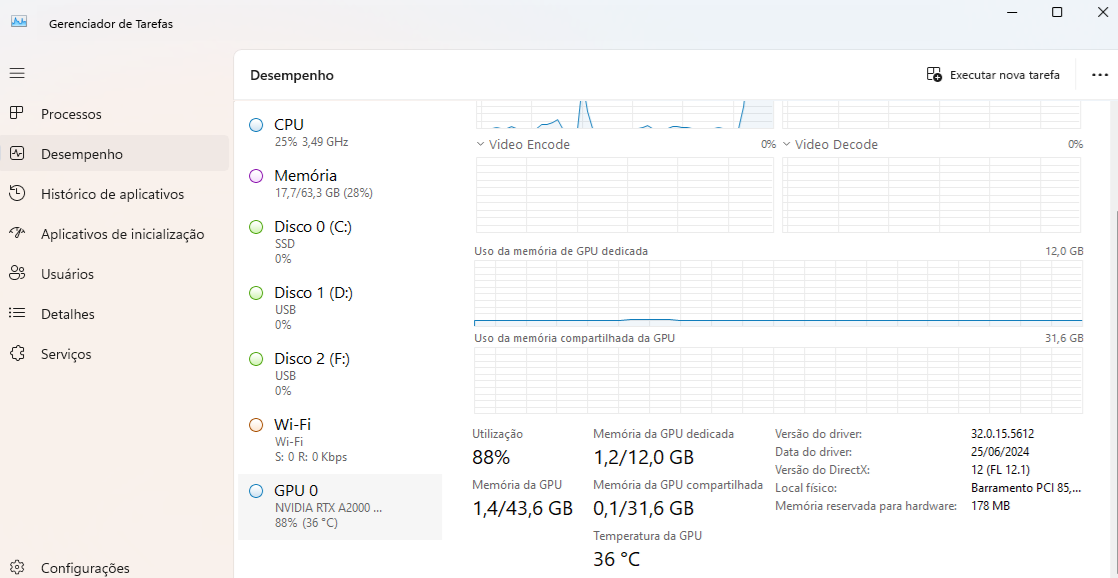